In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools
%matplotlib inline

### Tải dữ liệu

In [107]:
# Đọc dữ liệu từ các tệp CSV vào dataframe
folder='Datasets/'
raw_data_1 = pd.read_csv(folder +'2000-01.csv')
raw_data_2 = pd.read_csv(folder +'2001-02.csv')
raw_data_3 = pd.read_csv(folder +'2002-03.csv')
raw_data_4 = pd.read_csv(folder +'2003-04.csv')
raw_data_5 = pd.read_csv(folder +'2004-05.csv')
raw_data_6 = pd.read_csv(folder +'2005-06.csv')
raw_data_7 = pd.read_csv(folder +'2006-07.csv')
raw_data_8 = pd.read_csv(folder +'2007-08.csv')
raw_data_9 = pd.read_csv(folder +'2008-09.csv')
raw_data_10 = pd.read_csv(folder +'2009-10.csv')
raw_data_11 = pd.read_csv(folder +'2010-11.csv')
raw_data_12 = pd.read_csv(folder +'2011-12.csv')
raw_data_13 = pd.read_csv(folder +'2012-13.csv')
raw_data_14 = pd.read_csv(folder +'2013-14.csv')
raw_data_15 = pd.read_csv(folder +'2014-15.csv')
raw_data_16 = pd.read_csv(folder +'2015-16.csv')
raw_data_17 = pd.read_csv(folder +'2016-17.csv')
raw_data_18 = pd.read_csv(folder +'2017-18.csv')

In [108]:
# # Lấy tất cả các thống kê liên quan đến trận đấu
                      
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

playing_statistics_1 = raw_data_1[columns_req]                      
playing_statistics_2 = raw_data_2[columns_req]
playing_statistics_3 = raw_data_3[columns_req]
playing_statistics_4 = raw_data_4[columns_req]
playing_statistics_5 = raw_data_5[columns_req]
playing_statistics_6 = raw_data_6[columns_req]
playing_statistics_7 = raw_data_7[columns_req]
playing_statistics_8 = raw_data_8[columns_req]
playing_statistics_9 = raw_data_9[columns_req]
playing_statistics_10 = raw_data_10[columns_req]
playing_statistics_11 = raw_data_11[columns_req]   
playing_statistics_12 = raw_data_12[columns_req]
playing_statistics_13 = raw_data_13[columns_req]
playing_statistics_14 = raw_data_14[columns_req]
playing_statistics_15 = raw_data_15[columns_req]
playing_statistics_16 = raw_data_16[columns_req]
playing_statistics_17 = raw_data_17[columns_req]
playing_statistics_18 = raw_data_18[columns_req]

### Số bàn thắng ghi và số bàn thua sau mỗi tuần thi đấu, sắp xếp theo đội và tuần thi đấu.

In [109]:
# Lấy tổng số bàn thắng ghi được theo từng đội và từng tuần thi đấu
def get_goals_scored(playing_stat):
    # Tạo một từ điển với tên đội làm khóa
    teams = {}
    numeric_cols = playing_stat.select_dtypes(include=['number'])
    for i in playing_stat.groupby('HomeTeam')[numeric_cols.columns].mean().T.columns:
        teams[i] = []
    
    # Giá trị tương ứng với các khóa là danh sách chứa số bàn thắng của đội nhà và đội khách.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']  # Bàn thắng đội nhà
        ATGS = playing_stat.iloc[i]['FTAG']  # Bàn thắng đội khách
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
    
    # Tạo một dataframe cho tổng số bàn thắng ghi được, với các hàng là đội bóng và các cột là tuần thi đấu.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    # Tính tổng số bàn thắng ghi được cho đến tuần thi đấu hiện tại
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored

# Lấy tổng số bàn thua bị thủng theo từng đội và từng tuần thi đấu
def get_goals_conceded(playing_stat):
    # Tạo một từ điển với tên đội làm khóa
    teams = {}
    numeric_cols = playing_stat.select_dtypes(include=['number'])
    for i in playing_stat.groupby('HomeTeam')[numeric_cols.columns].mean().T.columns:
        teams[i] = []
    
    # Giá trị tương ứng với các khóa là danh sách chứa số bàn thua của đội nhà và đội khách.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']  # Bàn thua của đội khách
        HTGC = playing_stat.iloc[i]['FTAG']  # Bàn thua của đội nhà
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    # Tạo một dataframe cho tổng số bàn thua, với các hàng là đội bóng và các cột là tuần thi đấu.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    # Tính tổng số bàn thua cho đến tuần thi đấu hiện tại
    for i in range(2,39):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []  # Bàn thắng của đội nhà
    ATGS = []  # Bàn thắng của đội khách
    HTGC = []  # Bàn thua của đội nhà
    ATGC = []  # Bàn thua của đội khách

    for i in range(380):  # Duyệt qua tất cả các trận đấu
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:  # Sau mỗi 10 trận, chuyển sang tuần thi đấu tiếp theo
            j = j + 1
        
    playing_stat['HTGS'] = HTGS  # Thêm cột tổng số bàn thắng của đội nhà
    playing_stat['ATGS'] = ATGS  # Thêm cột tổng số bàn thắng của đội khách
    playing_stat['HTGC'] = HTGC  # Thêm cột tổng số bàn thua của đội nhà
    playing_stat['ATGC'] = ATGC  # Thêm cột tổng số bàn thua của đội khách
    
    return playing_stat

# Áp dụng cho từng bộ dữ liệu
playing_statistics_1 = get_gss(playing_statistics_1)
playing_statistics_2 = get_gss(playing_statistics_2)
playing_statistics_3 = get_gss(playing_statistics_3)
playing_statistics_4 = get_gss(playing_statistics_4)
playing_statistics_5 = get_gss(playing_statistics_5)
playing_statistics_6 = get_gss(playing_statistics_6)
playing_statistics_7 = get_gss(playing_statistics_7)
playing_statistics_8 = get_gss(playing_statistics_8)
playing_statistics_9 = get_gss(playing_statistics_9)
playing_statistics_10 = get_gss(playing_statistics_10)
playing_statistics_11 = get_gss(playing_statistics_11)
playing_statistics_12 = get_gss(playing_statistics_12)
playing_statistics_13 = get_gss(playing_statistics_13)
playing_statistics_14 = get_gss(playing_statistics_14)
playing_statistics_15 = get_gss(playing_statistics_15)
playing_statistics_16 = get_gss(playing_statistics_16)
playing_statistics_17 = get_gss(playing_statistics_17)
playing_statistics_18 = get_gss(playing_statistics_18)

C:\Users\Thanh\AppData\Local\Temp\ipykernel_16888\3145492897.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTGS'] = HTGS  # Thêm cột tổng số bàn thắng của đội nhà
C:\Users\Thanh\AppData\Local\Temp\ipykernel_16888\3145492897.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATGS'] = ATGS  # Thêm cột tổng số bàn thắng của đội khách
C:\Users\Thanh\AppData\Local\Temp\ipykernel_16888\3145492897.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

### Lấy điểm tương ứng

In [110]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matchres_points


def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    numeric_cols = playing_stat.select_dtypes(include=['number'])
    for i in playing_stat.groupby('HomeTeam')[numeric_cols.columns].mean().T.columns:
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
            
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat
    
# Apply to each dataset
playing_statistics_1 = get_agg_points(playing_statistics_1)
playing_statistics_2 = get_agg_points(playing_statistics_2)
playing_statistics_3 = get_agg_points(playing_statistics_3)
playing_statistics_4 = get_agg_points(playing_statistics_4)
playing_statistics_5 = get_agg_points(playing_statistics_5)
playing_statistics_6 = get_agg_points(playing_statistics_6)
playing_statistics_7 = get_agg_points(playing_statistics_7)
playing_statistics_8 = get_agg_points(playing_statistics_8)
playing_statistics_9 = get_agg_points(playing_statistics_9)
playing_statistics_10 = get_agg_points(playing_statistics_10)
playing_statistics_11 = get_agg_points(playing_statistics_11)
playing_statistics_12 = get_agg_points(playing_statistics_12)
playing_statistics_13 = get_agg_points(playing_statistics_13)
playing_statistics_14 = get_agg_points(playing_statistics_14)
playing_statistics_15 = get_agg_points(playing_statistics_15)
playing_statistics_16 = get_agg_points(playing_statistics_16)
playing_statistics_17 = get_agg_points(playing_statistics_17)
playing_statistics_18 = get_agg_points(playing_statistics_18)

C:\Users\Thanh\AppData\Local\Temp\ipykernel_16888\2255791312.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matchres_points = matchres.applymap(get_points)
C:\Users\Thanh\AppData\Local\Temp\ipykernel_16888\2255791312.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HTP'] = HTP
C:\Users\Thanh\AppData\Local\Temp\ipykernel_16888\2255791312.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['ATP'] = ATP
C:\Users\Thanh\AppData\Local\Tem

### Lấy phong độ của đội

In [111]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''  # Xóa thông tin hiện tại
        j = 0
        while j < num:
            form_final[i] += form[i-j]  # Thêm kết quả trước đó vào
            j += 1           
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]  # Vì dữ liệu phong độ không có sẵn cho n vòng (n*10)
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam  # Lấy tên đội nhà
        at = playing_stat.iloc[i].AwayTeam  # Lấy tên đội khách
        
        past = form.loc[ht][j]  # Lấy kết quả trong quá khứ của đội nhà
        h.append(past[num-1])  # Lưu kết quả (chỉ lấy trận đấu gần nhất)
        
        past = form.loc[at][j]  # Lấy kết quả trong quá khứ của đội khách
        a.append(past[num-1])  # Lưu kết quả (chỉ lấy trận đấu gần nhất)
        
        if ((i + 1)% 10) == 0:  # Nếu đã qua 10 trận đấu
            j = j + 1  # Tăng chỉ số để lấy kết quả trong các vòng đấu tiếp theo

    playing_stat['HM' + str(num)] = h  # Thêm cột phong độ đội nhà
    playing_stat['AM' + str(num)] = a  # Thêm cột phong độ đội khách
    
    return playing_stat


def add_form_df(playing_statistics):
    # Thêm phong độ cho các mức khác nhau (1 đến 5 trận trước đó)
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics    

# Áp dụng thay đổi cho các bảng dữ liệu
playing_statistics_1 = add_form_df(playing_statistics_1)
playing_statistics_2 = add_form_df(playing_statistics_2)
playing_statistics_3 = add_form_df(playing_statistics_3)
playing_statistics_4 = add_form_df(playing_statistics_4)
playing_statistics_5 = add_form_df(playing_statistics_5)
playing_statistics_6 = add_form_df(playing_statistics_6)
playing_statistics_7 = add_form_df(playing_statistics_7)
playing_statistics_8 = add_form_df(playing_statistics_8)
playing_statistics_9 = add_form_df(playing_statistics_9)
playing_statistics_10 = add_form_df(playing_statistics_10)
playing_statistics_11 = add_form_df(playing_statistics_11)
playing_statistics_12 = add_form_df(playing_statistics_12)
playing_statistics_13 = add_form_df(playing_statistics_13)
playing_statistics_14 = add_form_df(playing_statistics_14)
playing_statistics_15 = add_form_df(playing_statistics_15)
playing_statistics_16 = add_form_df(playing_statistics_16)
playing_statistics_17 = add_form_df(playing_statistics_17)
playing_statistics_18 = add_form_df(playing_statistics_18)


C:\Users\Thanh\AppData\Local\Temp\ipykernel_16888\753842386.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['HM' + str(num)] = h  # Thêm cột phong độ đội nhà
C:\Users\Thanh\AppData\Local\Temp\ipykernel_16888\753842386.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playing_stat['AM' + str(num)] = a  # Thêm cột phong độ đội khách
C:\Users\Thanh\AppData\Local\Temp\ipykernel_16888\753842386.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

### Lấy tuần thi đấu

In [112]:
# Rearranging columns
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

playing_statistics_1 = playing_statistics_1[cols]
playing_statistics_2 = playing_statistics_2[cols]
playing_statistics_3 = playing_statistics_3[cols]
playing_statistics_4 = playing_statistics_4[cols]
playing_statistics_5 = playing_statistics_5[cols]
playing_statistics_6 = playing_statistics_6[cols]
playing_statistics_7 = playing_statistics_7[cols]
playing_statistics_8 = playing_statistics_8[cols]
playing_statistics_9 = playing_statistics_9[cols]
playing_statistics_10 = playing_statistics_10[cols]
playing_statistics_11 = playing_statistics_11[cols]
playing_statistics_12 = playing_statistics_12[cols]
playing_statistics_13 = playing_statistics_13[cols]
playing_statistics_14 = playing_statistics_14[cols]
playing_statistics_15 = playing_statistics_15[cols]
playing_statistics_16 = playing_statistics_16[cols]
playing_statistics_17 = playing_statistics_17[cols]
playing_statistics_18 = playing_statistics_18[cols]

In [113]:
# Hàm để gán số tuần đấu (MatchWeek) cho mỗi trận đấu
def get_mw(playing_stat):
    j = 1  # Khởi tạo số tuần đấu bắt đầu từ 1
    MatchWeek = []  # Danh sách để lưu số tuần đấu cho mỗi trận đấu
    for i in range(380):  # Duyệt qua tất cả các trận đấu (380 trận trong mùa giải)
        MatchWeek.append(j)  # Gán số tuần đấu cho trận đấu hiện tại
        if ((i + 1)% 10) == 0:  # Sau mỗi 10 trận, tăng số tuần đấu lên 1
            j = j + 1
    playing_stat['MW'] = MatchWeek  # Thêm cột 'MW' vào dữ liệu
    return playing_stat

# Áp dụng hàm get_mw cho tất cả các bộ dữ liệu
playing_statistics_1 = get_mw(playing_statistics_1)
playing_statistics_2 = get_mw(playing_statistics_2)
playing_statistics_3 = get_mw(playing_statistics_3)
playing_statistics_4 = get_mw(playing_statistics_4)
playing_statistics_5 = get_mw(playing_statistics_5)
playing_statistics_6 = get_mw(playing_statistics_6)
playing_statistics_7 = get_mw(playing_statistics_7)
playing_statistics_8 = get_mw(playing_statistics_8)
playing_statistics_9 = get_mw(playing_statistics_9)
playing_statistics_10 = get_mw(playing_statistics_10)
playing_statistics_11 = get_mw(playing_statistics_11)
playing_statistics_12 = get_mw(playing_statistics_12)
playing_statistics_13 = get_mw(playing_statistics_13)
playing_statistics_14 = get_mw(playing_statistics_14)
playing_statistics_15 = get_mw(playing_statistics_15)
playing_statistics_16 = get_mw(playing_statistics_16)
playing_statistics_17 = get_mw(playing_statistics_17)
playing_statistics_18 = get_mw(playing_statistics_18)


### Final dataframe

In [114]:
# Kết hợp dữ liệu từ nhiều mùa giải
playing_stat = pd.concat([playing_statistics_1,
                          playing_statistics_2,
                          playing_statistics_3,
                          playing_statistics_4,
                          playing_statistics_5,
                          playing_statistics_6,
                          playing_statistics_7,
                          playing_statistics_8,
                          playing_statistics_9,
                          playing_statistics_10,
                          playing_statistics_11,
                          playing_statistics_12,
                          playing_statistics_13,
                          playing_statistics_14,
                          playing_statistics_15,
                          playing_statistics_16,
                          playing_statistics_17,
                          playing_statistics_18
                          ], ignore_index=True)

# Hàm tính điểm phong độ từ chuỗi kết quả trận đấu
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)  # Cộng điểm dựa trên kết quả 'W', 'D', 'L'
    return sum

# Tính tổng điểm phong độ trong 5 trận gần nhất của đội chủ nhà (HT) và đội khách (AT)
playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

# Áp dụng hàm tính điểm phong độ cho đội chủ nhà và đội khách
playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)

# Hàm xác định chuỗi thắng 3 trận (3-game win streak)
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0

# Hàm xác định chuỗi thắng 5 trận (5-game win streak)
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0

# Hàm xác định chuỗi thua 3 trận (3-game loss streak)
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0

# Hàm xác định chuỗi thua 5 trận (5-game loss streak)
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0

# Xác định chuỗi thắng/thua 3 và 5 trận gần nhất của đội chủ nhà (HT) và đội khách (AT)
playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

# Kiểm tra các cột trong DataFrame sau khi tính toán
playing_stat.keys()


Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [115]:
# Tính chênh lệch bàn thắng
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']  # Chênh lệch bàn thắng của đội nhà
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']  # Chênh lệch bàn thắng của đội khách

# Chênh lệch điểm
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']  # Chênh lệch điểm giữa đội nhà và đội khách
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']  # Chênh lệch điểm phong độ giữa đội nhà và đội khách


In [116]:
# Chuẩn hóa (scale) các cột DiffPts, DiffFormPts, HTGD, ATGD theo từng tuần thi đấu (Matchweek)
cols = ['HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'HTP', 'ATP']  # Các cột cần chuẩn hóa

# Đảm bảo rằng cột 'MW' (Matchweek) có kiểu dữ liệu là float để thực hiện phép chia
playing_stat.MW = playing_stat.MW.astype(float)  # Chuyển kiểu dữ liệu của cột 'MW' sang float

# Tiến hành chuẩn hóa từng cột trong danh sách 'cols' bằng cách chia giá trị của từng cột cho 'MW'
for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW  # Chia giá trị của cột cho số tuần thi đấu (Matchweek)


In [117]:
# Hàm chỉ giữ kết quả 'H' (thắng trên sân nhà) và thay thế các kết quả còn lại bằng 'NH' (không phải trên sân nhà)
def only_hw(string):
    if string == 'H':  # Nếu kết quả là 'H' (thắng trên sân nhà)
        return 'H'  # Trả về 'H'
    else:
        return 'NH'  # Nếu không phải 'H', trả về 'NH' (các kết quả khác như hòa và thua)

# Áp dụng hàm 'only_hw' lên cột 'FTR' (Full Time Result) để chỉ giữ 'H' và thay thế các kết quả còn lại bằng 'NH'
playing_stat['FTR'] = playing_stat.FTR.apply(only_hw)

# Tạo bộ dữ liệu thử nghiệm cho mùa giải 2015-16 (dữ liệu từ chỉ số 5700 trở đi)
playing_stat_test = playing_stat[5700:]  # Lấy các bản ghi từ chỉ số 5700 trở đi làm bộ dữ liệu thử nghiệm


In [118]:
# Lưu bộ dữ liệu cuối cùng vào file CSV
playing_stat.to_csv('final_dataset.csv')

In [119]:
# Lưu bộ dữ liệu kiểm thử vào file CSV
playing_stat_test.to_csv("test_set.csv")

In [120]:
# Tải bộ dữ liệu cuối cùng từ file CSV
dataset = pd.read_csv('final_dataset.csv')

In [121]:
dataset.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [122]:
dataset.keys()

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts'],
      dtype='object')

### Trực quan hóa dữu liệu

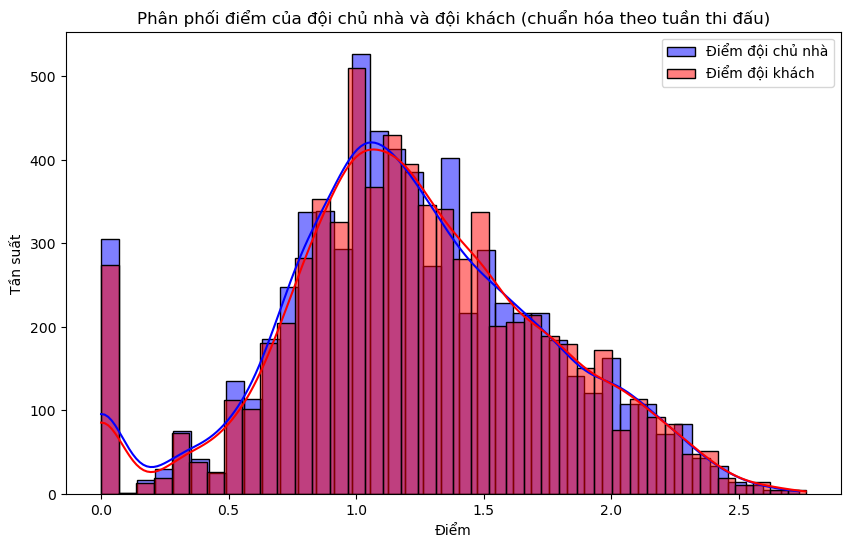

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ phân phối điểm của đội chủ nhà và đội khách
plt.figure(figsize=(10, 6))
sns.histplot(dataset['HTP'], kde=True, color='blue', label='Điểm đội chủ nhà')
sns.histplot(dataset['ATP'], kde=True, color='red', label='Điểm đội khách')
plt.title('Phân phối điểm của đội chủ nhà và đội khách (chuẩn hóa theo tuần thi đấu)')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')
plt.legend()
plt.show()

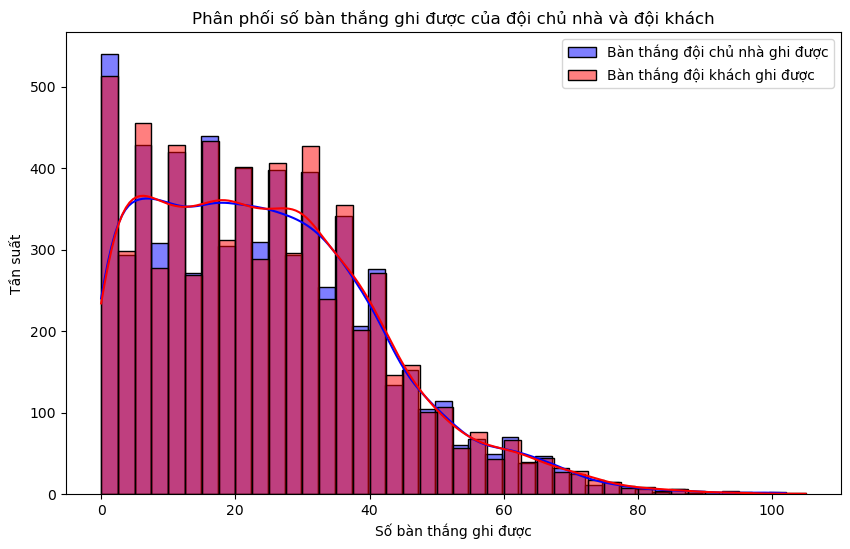

In [124]:
# Vẽ phân phối tổng số bàn thắng ghi được của đội chủ nhà và đội khách
plt.figure(figsize=(10, 6))
sns.histplot(dataset['HTGS'], kde=True, color='blue', label='Bàn thắng đội chủ nhà ghi được')
sns.histplot(dataset['ATGS'], kde=True, color='red', label='Bàn thắng đội khách ghi được')
plt.title('Phân phối số bàn thắng ghi được của đội chủ nhà và đội khách')
plt.xlabel('Số bàn thắng ghi được')
plt.ylabel('Tần suất')
plt.legend()
plt.show()

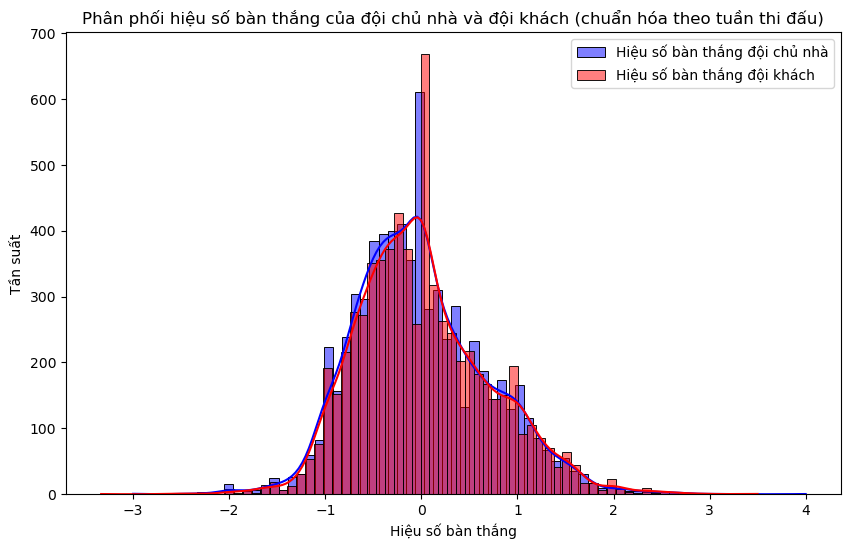

In [125]:
# Vẽ phân phối hiệu số bàn thắng của đội chủ nhà và đội khách
plt.figure(figsize=(10, 6))
sns.histplot(dataset['HTGD'], kde=True, color='blue', label='Hiệu số bàn thắng đội chủ nhà')
sns.histplot(dataset['ATGD'], kde=True, color='red', label='Hiệu số bàn thắng đội khách')
plt.title('Phân phối hiệu số bàn thắng của đội chủ nhà và đội khách (chuẩn hóa theo tuần thi đấu)')
plt.xlabel('Hiệu số bàn thắng')
plt.ylabel('Tần suất')
plt.legend()
plt.show()


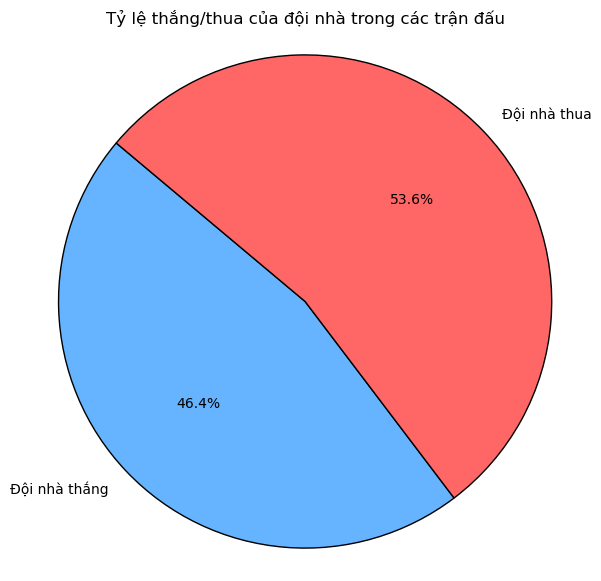

Số trận đội nhà thắng: 3176
Số trận đội nhà thua: 3664


In [126]:
import matplotlib.pyplot as plt

# Tính số trận đội nhà thắng, hòa và thua
n_homewins = len(dataset[dataset.FTR == 'H'])  # Đội nhà thắng
n_home_losses = len(dataset[dataset.FTR == 'NH'])  # Đội nhà thua

# Tạo một danh sách tỷ lệ thắng, thua và hòa
labels = ['Đội nhà thắng', 'Đội nhà thua']
sizes = [n_homewins, n_home_losses]
colors = ['#66b3ff', '#ff6666']  # Màu sắc cho từng phần
# Vẽ biểu đồ tròn
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Tỷ lệ thắng/thua của đội nhà trong các trận đấu')
plt.axis('equal')  # Đảm bảo hình tròn không bị biến dạng
plt.show()

# In kết quả
print("Số trận đội nhà thắng: {}".format(n_homewins))
print("Số trận đội nhà thua: {}".format(n_home_losses))



### Ma trận tương quan cho bộ dữ liệu

In [127]:
# Chọn chỉ các cột số 
numeric_dataset = dataset.select_dtypes(include=['number'])

# Tính toán ma trận tương quan 
plt.figure(figsize=(20, 10)) 
sns.heatmap(numeric_dataset.corr(), annot=True)

<Axes: >

In [128]:
# Xóa một số cột không cần thiết trong bộ dữ liệu
dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )

In [129]:
dataset2.keys()

Index(['Unnamed: 0', 'FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2',
       'AM3', 'HTGD', 'ATGD', 'DiffFormPts'],
      dtype='object')

In [130]:
dataset2.head(30)

,Unnamed: 0,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,0,H,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
1,1,H,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
2,2,NH,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
3,3,NH,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
4,4,H,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
5,5,NH,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
6,6,H,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
7,7,H,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
8,8,H,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000
9,9,H,0.000000,0.000000,M,M,M,M,M,M,0.000000,0.000000,0.000000


In [131]:
# Tính tỷ lệ thắng của đội nhà.

# Tổng số trận đấu.
n_matches = dataset2.shape[0]

# Tính số đặc trưng (features), trừ 1 vì chúng ta đang lưu một cột làm biến mục tiêu (win/lose/draw).
n_features = dataset2.shape[1] - 1

# Tính số trận đội nhà thắng.
n_homewins = len(dataset2[dataset2.FTR == 'H'])

# Tính tỷ lệ thắng của đội nhà.
win_rate = (float(n_homewins) / (n_matches)) * 100

# In kết quả
print("Tổng số trận đấu: {}".format(n_matches))
print ("Số đặc trưng: {}".format(n_features))
print("Số trận đội nhà thắng: {}".format(n_homewins))
print("Tỷ lệ thắng của đội nhà: {:.2f}%".format(win_rate))


Tổng số trận đấu: 6840
Số đặc trưng: 12
Số trận đội nhà thắng: 3176
Tỷ lệ thắng của đội nhà: 46.43%


In [132]:
# Trực quan hóa phân phối dữ liệu
from pandas.plotting import scatter_matrix

# Biểu đồ scatter matrix vẽ mỗi cột được chỉ định đối diện với mỗi cột khác.
# Bạn sẽ nhận thấy rằng đồ thị chéo được định nghĩa là histogram, có nghĩa là trong 
# phần của ma trận đồ thị, nơi biến được vẽ đối diện với chính nó, một histogram sẽ được vẽ.

# Biểu đồ scatter cho thấy một biến bị ảnh hưởng như thế nào bởi một biến khác.
# Mối quan hệ giữa hai biến gọi là tương quan của chúng.
# Tương quan âm vs tương quan dương.

# HTGD - Chênh lệch bàn thắng của đội nhà
# ATGD - Chênh lệch bàn thắng của đội khách
# HTP - Điểm của đội nhà
# ATP - Điểm của đội khách
# DiffFormPts - Chênh lệch điểm trong form thi đấu
# DiffLP - Chênh lệch trong dự đoán năm ngoái

scatter_matrix(dataset2[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))

array([[<Axes: xlabel='HTGD', ylabel='HTGD'>,
        <Axes: xlabel='ATGD', ylabel='HTGD'>,
        <Axes: xlabel='HTP', ylabel='HTGD'>,
        <Axes: xlabel='ATP', ylabel='HTGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTGD'>],
       [<Axes: xlabel='HTGD', ylabel='ATGD'>,
        <Axes: xlabel='ATGD', ylabel='ATGD'>,
        <Axes: xlabel='HTP', ylabel='ATGD'>,
        <Axes: xlabel='ATP', ylabel='ATGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATGD'>],
       [<Axes: xlabel='HTGD', ylabel='HTP'>,
        <Axes: xlabel='ATGD', ylabel='HTP'>,
        <Axes: xlabel='HTP', ylabel='HTP'>,
        <Axes: xlabel='ATP', ylabel='HTP'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTP'>],
       [<Axes: xlabel='HTGD', ylabel='ATP'>,
        <Axes: xlabel='ATGD', ylabel='ATP'>,
        <Axes: xlabel='HTP', ylabel='ATP'>,
        <Axes: xlabel='ATP', ylabel='ATP'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATP'>],
       [<Axes: xlabel='HTGD', ylabel='DiffFormPts'>,
        <Axes

In [133]:
# Tách dữ liệu thành tập đặc trưng và biến mục tiêu
# FTR = Kết quả cuối cùng (H=Chiến thắng đội nhà, D=Hòa, A=Chiến thắng đội khách)
X_all = dataset2.drop(['FTR'], axis=1)  # X_all là tập đặc trưng (tất cả các cột trừ FTR)
y_all = dataset2['FTR']  # y_all là biến mục tiêu (FTR)

# Chuẩn hóa dữ liệu.
from sklearn.preprocessing import scale

# Trung tâm dữ liệu tại giá trị trung bình và chuẩn hóa các thành phần để có phương sai bằng 1.
cols = [['HTGD', 'ATGD', 'HTP', 'ATP']]  # Cột cần chuẩn hóa
for col in cols:
    X_all[col] = scale(X_all[col])  # Áp dụng chuẩn hóa cho các cột trong danh sách cols


In [134]:
# 3 trận thắng gần nhất cho cả hai đội
X_all.HM1 = X_all.HM1.astype('str')  # Chuyển cột HM1 (Home Team's result in last match) thành kiểu chuỗi
X_all.HM2 = X_all.HM2.astype('str')  # Chuyển cột HM2 thành kiểu chuỗi
X_all.HM3 = X_all.HM3.astype('str')  # Chuyển cột HM3 thành kiểu chuỗi
X_all.AM1 = X_all.AM1.astype('str')  # Chuyển cột AM1 (Away Team's result in last match) thành kiểu chuỗi
X_all.AM2 = X_all.AM2.astype('str')  # Chuyển cột AM2 thành kiểu chuỗi
X_all.AM3 = X_all.AM3.astype('str')  # Chuyển cột AM3 thành kiểu chuỗi

# Chúng ta muốn các biến liên tục có kiểu số nguyên cho dữ liệu đầu vào, vì vậy cần loại bỏ các biến phân loại.
def preprocess_features(X):
    ''' Xử lý dữ liệu bóng đá và chuyển các biến phân loại thành biến giả (dummy variables). '''
    
    # Khởi tạo DataFrame đầu ra mới
    output = pd.DataFrame(index = X.index)

    # Duyệt qua từng cột trong dữ liệu
    for col, col_data in X.items():

        # Nếu kiểu dữ liệu là phân loại (categorical), chuyển đổi thành các biến giả (dummy variables)
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Thu thập các cột đã được xử lý
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)  # Áp dụng hàm preprocess_features cho X_all
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))  # In ra số lượng và tên các cột sau khi xử lý


Processed feature columns (30 total features):
['Unnamed: 0', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts']


In [135]:
X_all.head(10)

,Unnamed: 0,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,...,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffFormPts
0,0,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
1,1,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
2,2,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
3,3,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
4,4,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
5,5,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
6,6,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
7,7,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
8,8,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0
9,9,-2.280523,-2.345017,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.013972,-0.020983,0.0


In [136]:
y_all

0        H
1        H
2       NH
3       NH
4        H
        ..
6835     H
6836    NH
6837    NH
6838     H
6839     H
Name: FTR, Length: 6840, dtype: object

### Chia bộ dữ liệu

In [137]:
from sklearn.model_selection import train_test_split

# Xáo trộn và chia bộ dữ liệu thành tập huấn luyện và tập kiểm tra.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y_all)

### LOGISTIC REGRESSION

In [138]:
# Huấn luyện mô hình Hồi quy Logistic trên tập huấn luyện
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

c:\Users\Thanh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [139]:
Y_pred = classifier.predict(X_test)

In [140]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

In [141]:
sns.heatmap(cm, annot=True,fmt='d')

<Axes: >

In [142]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.65      0.54      0.59       953
          NH       0.65      0.74      0.69      1099

    accuracy                           0.65      2052
   macro avg       0.65      0.64      0.64      2052
weighted avg       0.65      0.65      0.65      2052



### SVM

In [143]:
# Huấn luyện mô hình SVM trên tập huấn luyện
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [144]:
Y_pred = classifier.predict(X_test)

In [145]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

In [146]:
sns.heatmap(cm, annot=True, fmt='d')

<Axes: >

In [147]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.00      0.00      0.00       953
          NH       0.54      1.00      0.70      1099

    accuracy                           0.54      2052
   macro avg       0.27      0.50      0.35      2052
weighted avg       0.29      0.54      0.37      2052



c:\Users\Thanh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Thanh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Thanh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### RANDOM FOREST

In [148]:
# Huấn luyện mô hình RANDOM FOREST trên tập huấn luyện
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='sqrt',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1)

In [149]:
y_train

6142    NH
5105    NH
3047     H
803     NH
1200    NH
        ..
3896    NH
4500     H
5817    NH
1388    NH
1254     H
Name: FTR, Length: 4788, dtype: object

In [150]:
Y_pred = classifier.predict(X_test)

In [151]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

In [152]:
sns.heatmap(cm, annot=True, fmt='d')

<Axes: >

In [153]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           H       0.63      0.55      0.58       953
          NH       0.65      0.72      0.68      1099

    accuracy                           0.64      2052
   macro avg       0.64      0.63      0.63      2052
weighted avg       0.64      0.64      0.64      2052



### XGBOOST

In [154]:
import numpy as np

# Chuyển đổi giá trị 'H' và 'NH' thành số
y_train = np.where(y_train == 'H', 1, 0)
y_test = np.where(y_test == 'H', 1, 0)

# Kiểm tra lại sau khi chuyển đổi
print(np.unique(y_train))
print(np.unique(y_test))

# Huấn luyện mô hình XGBoost
from xgboost import XGBClassifier
classifier = XGBClassifier(seed=82)
classifier.fit(X_train, y_train)


[0 1]
[0 1]


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [155]:
Y_pred = classifier.predict(X_test)

In [156]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

In [157]:
sns.heatmap(cm, annot=True,fmt='d')

<Axes: >

In [158]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1099
           1       0.59      0.55      0.57       953

    accuracy                           0.61      2052
   macro avg       0.61      0.61      0.61      2052
weighted avg       0.61      0.61      0.61      2052



### Rõ ràng XGBoost có vẻ là mô hình tốt nhất vì nó có điểm F1 và điểm độ chính xác cao nhất trên bộ dữ liệu kiểm tra.

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

# Tạo danh sách tham số để điều chỉnh
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }

def predict_labels(clf, features, target):
    ''' Dự đoán nhãn sử dụng mô hình đã huấn luyện và tính toán F1 score. '''
    y_pred = clf.predict(features)
    return f1_score(target, y_pred), sum(target == y_pred) / float(len(y_pred))

# Khởi tạo mô hình XGBoost
clf = xgb.XGBClassifier(seed=2)

# Tạo hàm f1 scorer với pos_label là 1 (thay vì 'H')
f1_scorer = make_scorer(f1_score, pos_label=1)

# Thực hiện tìm kiếm lưới (Grid Search) trên mô hình sử dụng f1_scorer làm phương pháp đánh giá
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# Huấn luyện đối tượng GridSearchCV với dữ liệu huấn luyện
grid_obj = grid_obj.fit(X_train, y_train)

# Lấy mô hình tốt nhất từ GridSearch
clf = grid_obj.best_estimator_
print(clf)

# Báo cáo F1 score cho dữ liệu huấn luyện và kiểm tra sau khi điều chỉnh tham số
f1, acc = predict_labels(clf, X_train, y_train)
print("F1 score và accuracy cho bộ dữ liệu huấn luyện: {:.4f} , {:.4f}.".format(f1, acc))

f1, acc = predict_labels(clf, X_test, y_test)
print("F1 score và accuracy cho bộ dữ liệu kiểm tra: {:.4f} , {:.4f}.".format(f1, acc))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
F1 score và accuracy cho bộ dữ liệu huấn luyện: 0.6103 , 0.6708.
F1 score và accuracy cho bộ dữ liệu kiểm tra: 0.5784 , 0.6462.
